<h2>Task 1. Data Selection and Distribution.</h2>
1. Can you identify any clear patterns by initial exploration of the data using histogram or box plot?
2. What is the proportion of individuals who purchased organic products?
3. Did you have to fix any data quality problems? Detail them.
4. What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice.
5. What distribution scheme did you use? What data partitioning allocation did you set? Explain your selection.

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# read the organics dataset
df = pd.read_csv('organics.csv')

# show all columns information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 18 columns):
CUSTID          22223 non-null int64
GENDER          19711 non-null object
DOB             22223 non-null object
EDATE           22223 non-null object
AGE             20715 non-null float64
AGEGRP1         20715 non-null object
AGEGRP2         20715 non-null object
TV_REG          21758 non-null object
NGROUP          21549 non-null object
NEIGHBORHOOD    21549 non-null float64
LCDATE          21942 non-null object
ORGANICS        22223 non-null int64
BILL            22223 non-null float64
REGION          21758 non-null object
CLASS           22223 non-null object
ORGYN           22223 non-null int64
AFFL            21138 non-null float64
LTIME           21942 non-null float64
dtypes: float64(5), int64(3), object(10)
memory usage: 3.1+ MB
None


In [109]:
#Can see missing values. Assume to explore GENDER
df['GENDER'].describe()

count     19711
unique        3
top           F
freq      12149
Name: GENDER, dtype: object

In [ ]:
df[['GENDER','']]

In [110]:
#Can oberve that GENDER has missing values
df['AGE'].unique()

array([76., 49., 70., 65., 68., 72., 74., 62., 43., 60., nan, 51., 64.,
       37., 54., 42., 66., 46., 39., 75., 79., 50., 35., 71., 44., 31.,
       41., 58., 47., 61., 53., 57., 45., 55., 18., 56., 67., 78., 48.,
       52., 34., 40., 38., 77., 27., 36., 59., 63., 26., 69., 73., 33.,
       30., 29., 32., 22., 25., 28., 23., 20., 24., 19., 21.])

In [111]:
#Occurences for each unique values in GENDER
df['GENDER'].value_counts()

F    12149
M     5815
U     1747
Name: GENDER, dtype: int64

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 18 columns):
CUSTID          22223 non-null int64
GENDER          19711 non-null object
DOB             22223 non-null object
EDATE           22223 non-null object
AGE             20715 non-null float64
AGEGRP1         20715 non-null object
AGEGRP2         20715 non-null object
TV_REG          21758 non-null object
NGROUP          21549 non-null object
NEIGHBORHOOD    21549 non-null float64
LCDATE          21942 non-null object
ORGANICS        22223 non-null int64
BILL            22223 non-null float64
REGION          21758 non-null object
CLASS           22223 non-null object
ORGYN           22223 non-null int64
AFFL            21138 non-null float64
LTIME           21942 non-null float64
dtypes: float64(5), int64(3), object(10)
memory usage: 3.1+ MB


In [122]:
def data_proc():
    df['AGE'].fillna(df['AGE'].mean(), inplace=True)
    df['NEIGHBORHOOD'].fillna(df['NEIGHBORHOOD'].mean(), inplace=True)
    df['AFFL'].fillna(df['AFFL'].mean(), inplace=True)
    df['LTIME'].fillna(df['LTIME'].mean(), inplace=True)
    
data_proc()

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 18 columns):
CUSTID          22223 non-null int64
GENDER          19711 non-null object
DOB             22223 non-null object
EDATE           22223 non-null object
AGE             22223 non-null float64
AGEGRP1         20715 non-null object
AGEGRP2         20715 non-null object
TV_REG          21758 non-null object
NGROUP          21549 non-null object
NEIGHBORHOOD    22223 non-null float64
LCDATE          21942 non-null object
ORGANICS        22223 non-null int64
BILL            22223 non-null float64
REGION          21758 non-null object
CLASS           22223 non-null object
ORGYN           22223 non-null int64
AFFL            22223 non-null float64
LTIME           22223 non-null float64
dtypes: float64(5), int64(3), object(10)
memory usage: 3.1+ MB


In [125]:
df['AGEGRP1'].unique()

array(['60-80', '40-60', nan, '20-40', '<20'], dtype=object)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 18 columns):
CUSTID          22223 non-null int64
GENDER          19711 non-null object
DOB             22223 non-null object
EDATE           22223 non-null object
AGE             22223 non-null float64
AGEGRP1         20715 non-null object
AGEGRP2         20715 non-null object
TV_REG          21758 non-null object
NGROUP          21549 non-null object
NEIGHBORHOOD    22223 non-null float64
LCDATE          21942 non-null object
ORGANICS        22223 non-null int64
BILL            22223 non-null float64
REGION          21758 non-null object
CLASS           22223 non-null object
ORGYN           22223 non-null int64
AFFL            22223 non-null float64
LTIME           22223 non-null float64
dtypes: float64(5), int64(3), object(10)
memory usage: 3.1+ MB


In [127]:
cols_numeric = list(df._get_numeric_data().keys())
cols_remove = ['CUSTID']
[cols_numeric.remove(x) for x in cols_remove]

[None]

In [128]:
cols_numeric

['AGE', 'NEIGHBORHOOD', 'ORGANICS', 'BILL', 'ORGYN', 'AFFL', 'LTIME']

In [129]:
temp = df.fillna(0)

In [130]:
temp.head()

,CUSTID,GENDER,DOB,EDATE,AGE,AGEGRP1,AGEGRP2,TV_REG,NGROUP,NEIGHBORHOOD,LCDATE,ORGANICS,BILL,REGION,CLASS,ORGYN,AFFL,LTIME
0,140,U,1921-09-16,1998-02-23,76.0,60-80,70-80,Wales & West,C,16.0,1994-11-07,0,16000.00,Midlands,Gold,0,10.0,4.0
1,620,U,1949-02-12,1998-02-23,49.0,40-60,40-50,Wales & West,D,35.0,1993-06-04,0,6000.00,Midlands,Gold,0,4.0,5.0
2,868,F,1927-11-27,1998-02-23,70.0,60-80,70-80,Wales & West,D,27.0,1990-08-02,1,0.02,Midlands,Silver,1,5.0,8.0
3,1120,M,1932-04-10,1998-02-23,65.0,60-80,60-70,Midlands,F,51.0,1991-07-01,1,0.01,Midlands,Tin,1,10.0,7.0
4,2313,F,1929-05-21,1998-02-23,68.0,60-80,60-70,Midlands,A,4.0,1990-03-01,0,0.01,Midlands,Tin,0,11.0,8.0


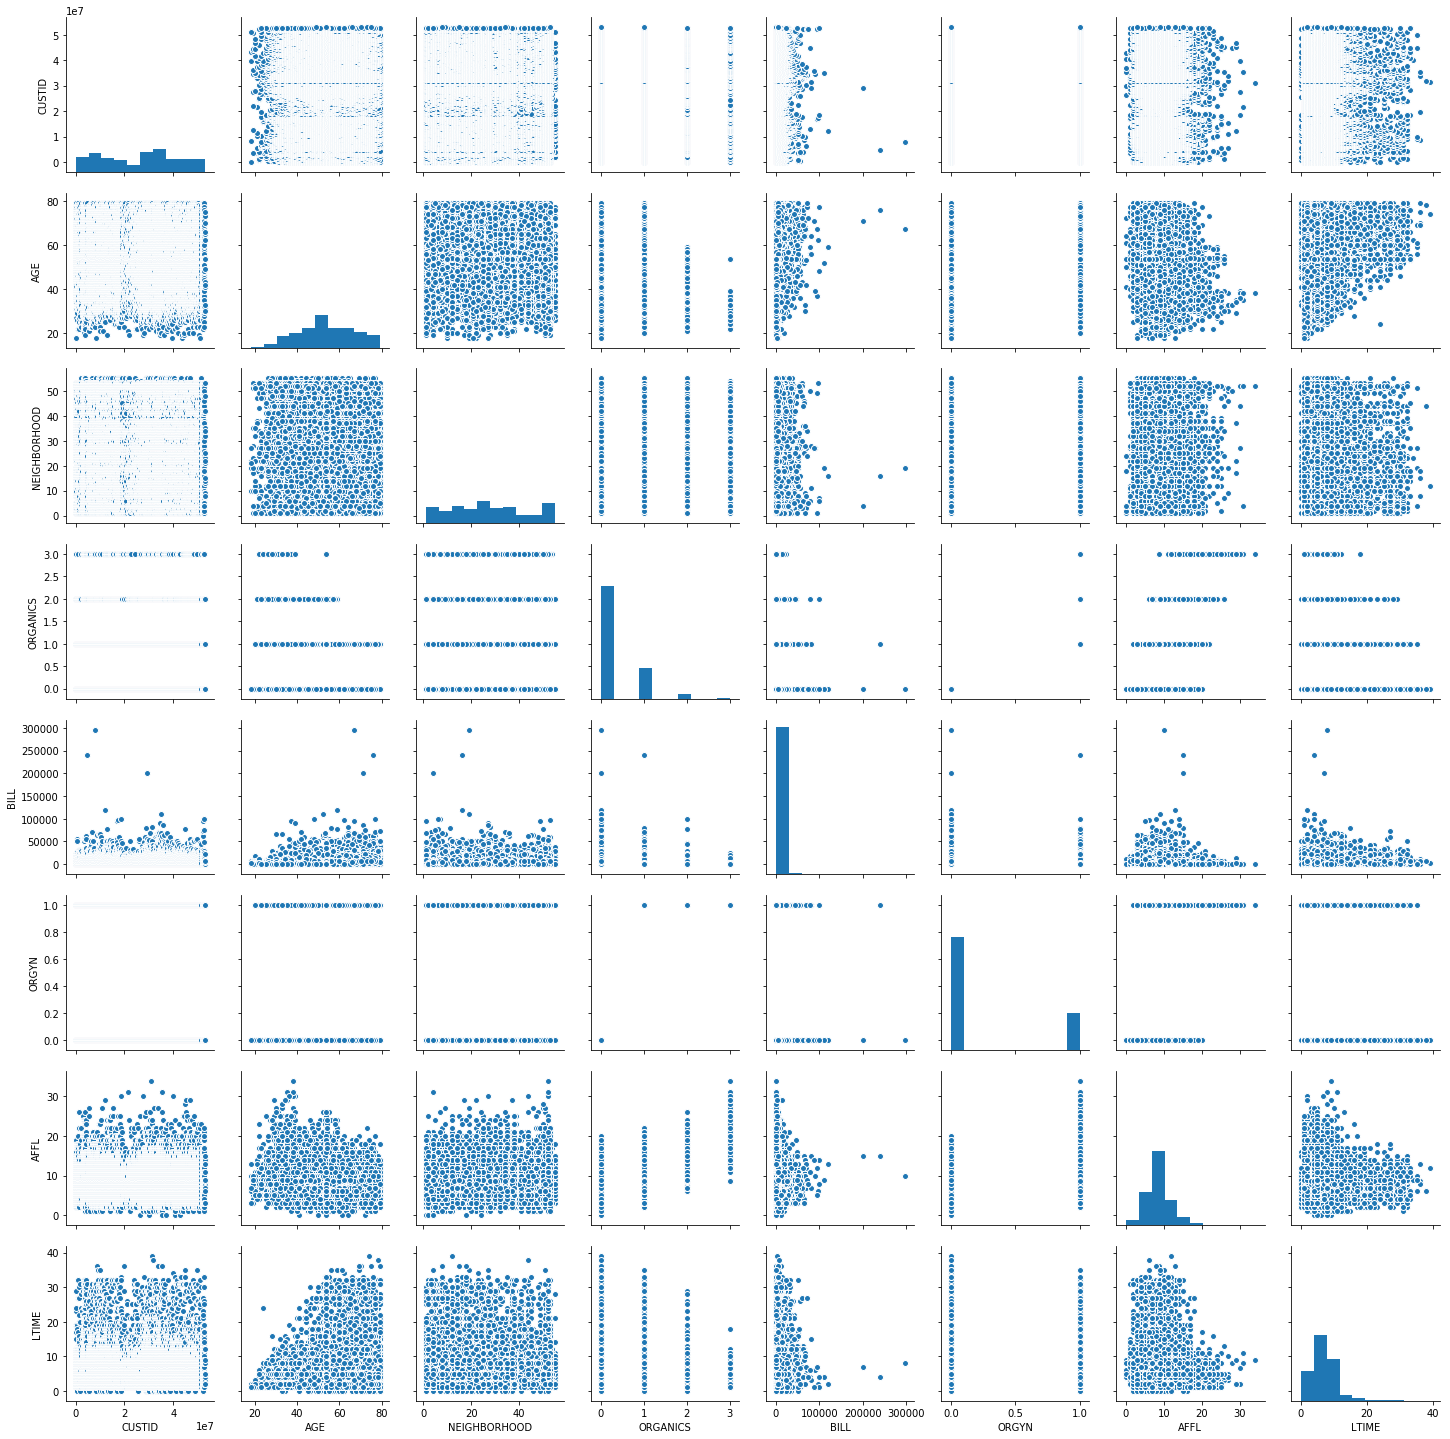

In [131]:
sns.pairplot(temp)
plt.show()

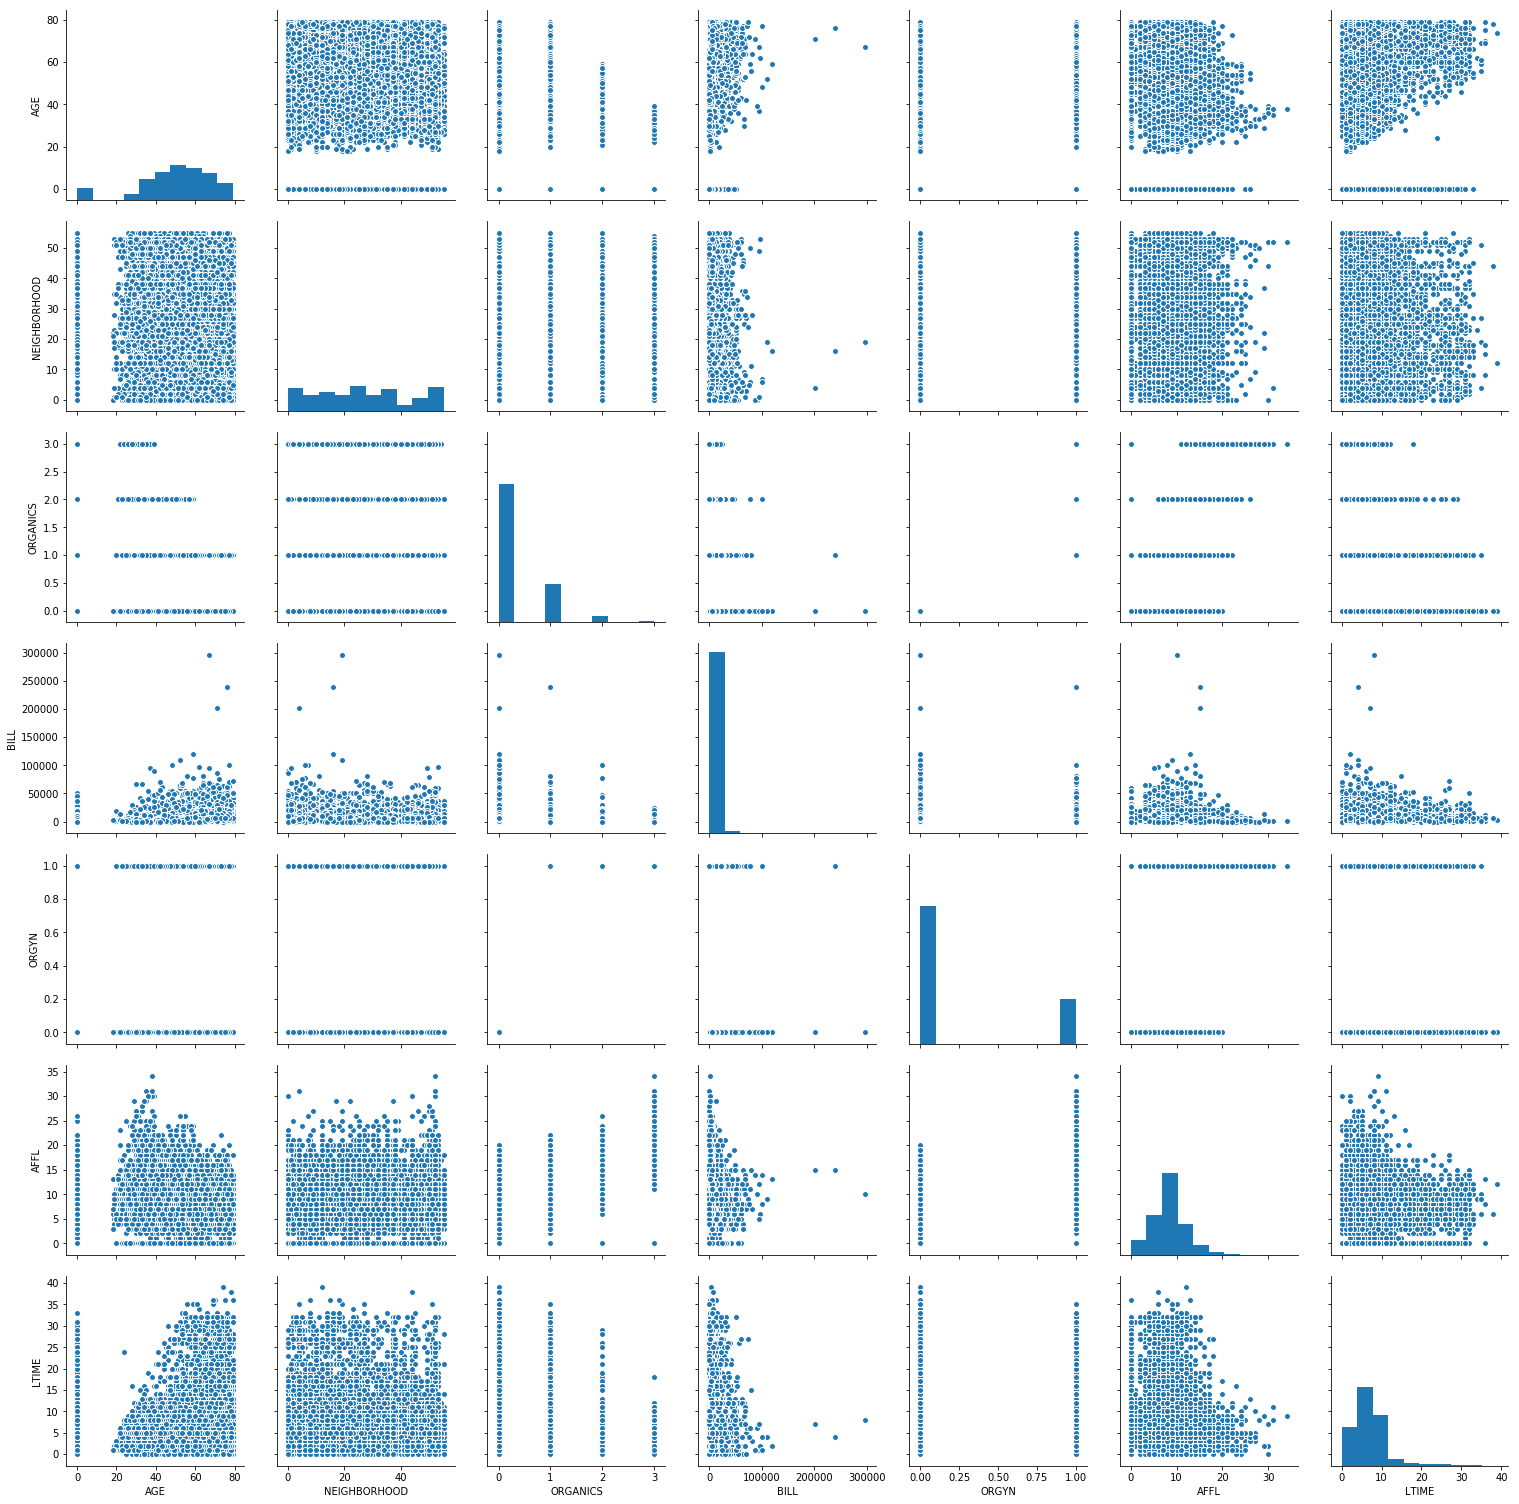

In [10]:
sns.pairplot(temp[['AGE', 'NEIGHBORHOOD', 'ORGANICS', 'BILL', 'ORGYN', 'AFFL', 'LTIME']], size=3)
plt.show()

In [11]:
# get the value count of each gender
print("Raw count of how many genders bought organic products")
print(df.groupby(['ORGANICS'])['GENDER'].value_counts())

Raw count of how many genders bought organic products
ORGANICS  GENDER
0         F         7944
          M         4849
          U         1642
1         F         3539
          M          821
          U           91
2         F          538
          M          118
          U           12
3         F          128
          M           27
          U            2
Name: GENDER, dtype: int64
